In [ ]:
# Import required packages

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math



In [ ]:
from google.colab import files
uploaded = files.upload()

import io
listings = pd.read_csv(io.BytesIO(uploaded['woodbridge_properties.csv']))

Saving woodbridge_properties.csv to woodbridge_properties.csv


# Exploratory Data Analysis

In [ ]:
# Required columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

<Axes: >

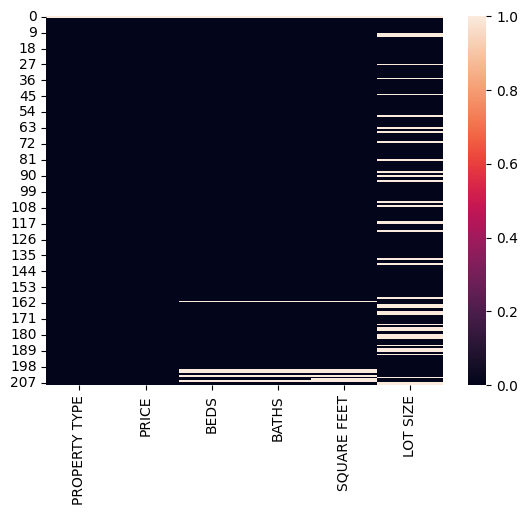

In [ ]:
# Explore missing values across features

sns.heatmap(listings.isnull(), cbar=True)

<Axes: >

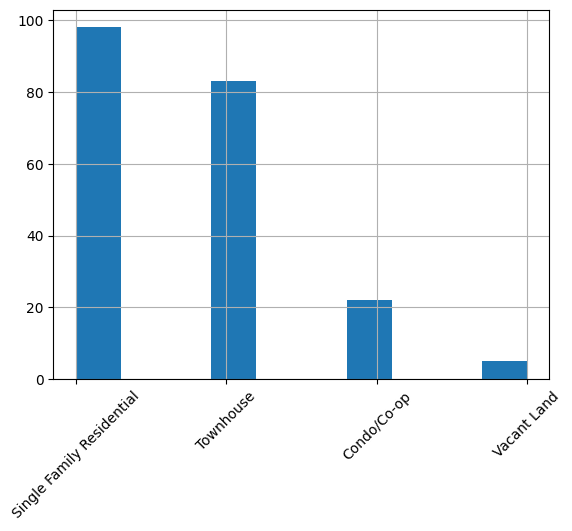

In [ ]:
# Explore frequency distribution of different property types

listings['PROPERTY TYPE'].hist(xrot=45.0)

In [ ]:
listings['PROPERTY TYPE'].unique()

array([nan, 'Single Family Residential', 'Townhouse', 'Condo/Co-op',
       'Vacant Land'], dtype=object)

In [ ]:
property_types_to_remove = ['Vacant Land']

listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

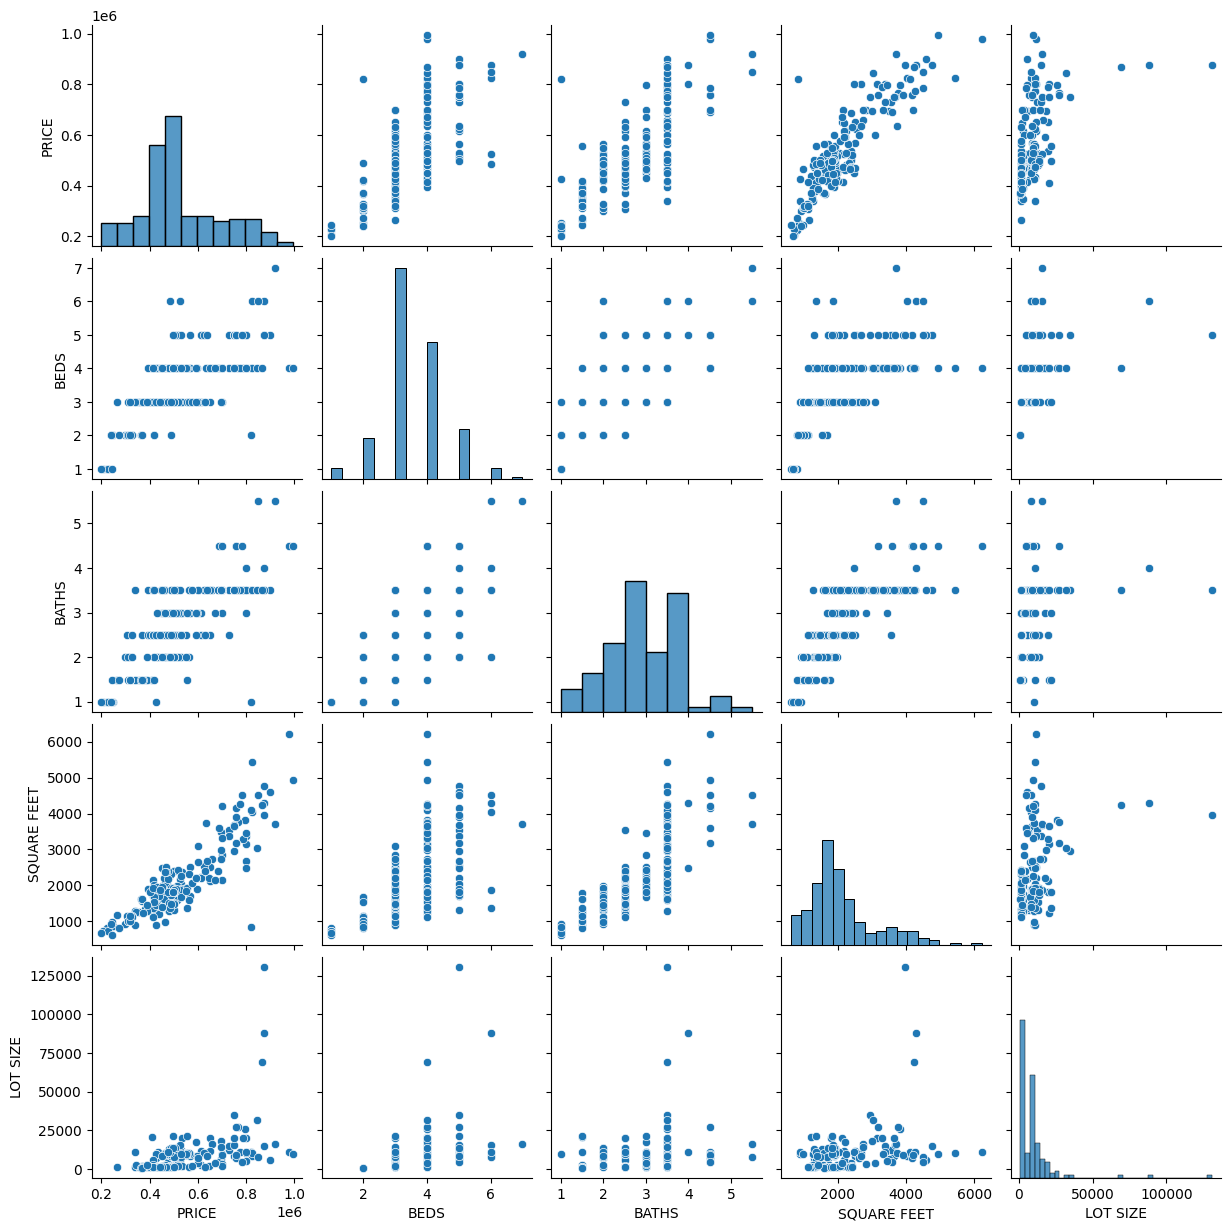

In [ ]:
sns.pairplot(listings)

# Data Processing

In [ ]:
# Removing all outliers

listings.drop(listings[listings['SQUARE FEET'] > 5000 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 45000 ].index, inplace=True)

In [ ]:
numeric_columns = listings.select_dtypes(include='number').columns
listings[numeric_columns] = listings[numeric_columns].fillna(listings[numeric_columns].mean())

In [ ]:
listings.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,517203.818182,3.439394,2.674242,2056.472081,7784.743750
std,155719.773690,0.986712,0.843090,891.406960,6084.703808
min,200000.000000,1.000000,1.000000,625.000000,936.000000
25%,424950.000000,3.000000,2.000000,1484.000000,1868.500000
50%,489000.000000,3.000000,2.500000,1854.000000,7784.743750
75%,599500.000000,4.000000,3.500000,2388.000000,10064.500000
max,995000.000000,7.000000,5.500000,4944.000000,34813.000000


In [ ]:
listings.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

# Linear Regression Model

In [ ]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [ ]:
X = pd.get_dummies(listings[predictors], drop_first=True)
y = listings['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

# Model Evaluation:

In [ ]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'],
      dtype='object')

In [ ]:
re_prices.intercept_

139630.9525484668

In [ ]:
re_prices.coef_

array([3.80433407e+03, 2.66466923e+04, 1.01820912e+02, 2.91903732e+00,
       9.51653064e+04, 4.00843405e+04])

In [ ]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
127,3.0,1.5,1789.0,1459.0,False,True
99,3.0,3.5,2154.0,2487.0,False,True
43,4.0,2.0,1732.0,9025.0,True,False
17,4.0,3.5,3497.0,6416.0,True,False
5,3.0,2.5,1568.0,1742.0,False,True


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.897505701044761
MAE:  38389.01659716624
RMSE:  49821.603354958046
Max error:  141733.44235495396


**R²:** Value: 0.8975 -
This indicates that approximately 89.75% of the variance is explained by the model. An R² value close to 1 suggests a good fit, so this is quite strong.

**MAE (Mean Absolute Error):** Value: 38,389.02-
Here the Mean Absolute Error is $38,389.02. This represents the average absolute error between predicted and actual values. A lower MAE is better.

**RMSE (Root Mean Square Error):** Value: 49,821.60 -
The RMSE provides insight into the magnitude of typical prediction errors. A high RMSE suggests that there are significant prediction errors. There is a substantial difference between MAE and RMSE showing that we have some outliers.

**Max Error:** Value: 141,733.44 -
This is the largest single prediction error. A high max error indicates that there are instances where the model's predictions were significantly off. This could be a concern if the application requires precise predictions.

**Model Performance/Assessment:** -
If the predicted values are large and some error is acceptable, this model could be suitable. However, if high precision is required or the values are small, the model’s performance may not be sufficient and could require improvement.

